In [2]:
# import library
import sklearn
from sklearn import svm
from sklearn import metrics
import pandas as pd

In [3]:
# import data
drug = pd.read_csv("D:/Datasets/latih_parted_1.csv")
# lihat semua kolom dalam data
drug.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1274', '1275', '1276', '1277', '1278', '1279', '1280', '1281', '1282',
       'label'],
      dtype='object', length=1284)

In [4]:
protein = drug['1282'] # nama protein
compound_id = drug['0'] # id senyawa
comp_pro = drug[['0', '1282']]
print(protein.head(4))
print(compound_id.head(4))
print(comp_pro.head(4))


0      CATD_HUMAN
1       AMD_HUMAN
2    Q96DH9_HUMAN
3     FGFR3_HUMAN
Name: 1282, dtype: object
0          176
1         4725
2    121304016
3        27350
Name: 0, dtype: object
           0          1282
0        176    CATD_HUMAN
1       4725     AMD_HUMAN
2  121304016  Q96DH9_HUMAN
3      27350   FGFR3_HUMAN


In [5]:
drug.head(4)

,0,1,2,3,4,5,6,7,8,9,...,1274,1275,1276,1277,1278,1279,1280,1281,1282,label
0,176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.117043,0.000000,0.073922,0.000000,0.000000,0.228953,0.131417,CATD_HUMAN,0
1,4725,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119675,0.115619,0.040568,0.109533,0.397566,0.231237,0.000000,0.194726,AMD_HUMAN,0
2,121304016,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.207746,0.200704,0.211268,0.126761,0.172535,0.000000,0.785211,0.676056,Q96DH9_HUMAN,0
3,27350,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.074534,0.089441,0.365217,0.141615,0.277019,0.238509,FGFR3_HUMAN,0


In [6]:
# untuk data latih keluarkan kolom nama/id senyawa dan protein
features = drug.drop(columns=['0', '1282'])
features.head(4)

,1,2,3,4,5,6,7,8,9,10,...,1273,1274,1275,1276,1277,1278,1279,1280,1281,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.176591,0.000000,0.117043,0.000000,0.073922,0.000000,0.000000,0.228953,0.131417,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.174442,0.119675,0.115619,0.040568,0.109533,0.397566,0.231237,0.000000,0.194726,0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.207746,0.200704,0.211268,0.126761,0.172535,0.000000,0.785211,0.676056,0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.106832,0.000000,0.000000,0.074534,0.089441,0.365217,0.141615,0.277019,0.238509,0


In [7]:
# untuk data latih keluarkan kolom label
features_train = features.drop(columns=['label'])
features_train.head(4)

,1,2,3,4,5,6,7,8,9,10,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.040041,0.176591,0.000000,0.117043,0.000000,0.073922,0.000000,0.000000,0.228953,0.131417
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.158215,0.174442,0.119675,0.115619,0.040568,0.109533,0.397566,0.231237,0.000000,0.194726
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.137324,0.000000,0.207746,0.200704,0.211268,0.126761,0.172535,0.000000,0.785211,0.676056
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.314907,0.106832,0.000000,0.000000,0.074534,0.089441,0.365217,0.141615,0.277019,0.238509


In [8]:
# tentukan data latih
x = features_train
y = features['label']

In [9]:
# data dibagi menjadi data latih (x_train, y_train) dan data uji (x_test, y_test)
# untuk membangun model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
print(x_train, y_train)

1    2    3    4    5    6    7    8    9   10  ...      1272  \
186   1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.085060   
316   1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.124204   
760   1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.120370   
1015  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.000000   
315   1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.114035   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
1132  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.148571   
1452  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.188103   
1716  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.129520   
208   1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.264706   
1490  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.109756   

          1273      1274      1275      1276      1277      1278      1279  \
186   0.140676  0.064340  0.124318  0.130861  0.13740

In [10]:
# kelas 0 dan 1
classes = ['false', 'true']

In [11]:
# tentukan model berdasarkan algoritma SVM
# tentukan kernel, C, dll (lihat materi pak Wisnu)
svmmodel = svm.SVC(kernel='linear', C=1.0, gamma='scale')

In [12]:
# latih/fit model dengan data latih
svmmodel.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# uji model dengan data uji yang dibagi di atas
# (uji/prediksi 1)
y_pred = svmmodel.predict(x_test)

In [14]:
# akurasi prediksi dengan data uji 1
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:', acc)

accuracy: 0.8843683083511777


In [16]:
# import data baru untuk diprediksi kelas-kelasnya
# data baru yaitu (drug_data_uji.csv)
new_data = pd.read_csv("D:/Datasets/drug_test.csv")

In [17]:
# prediksi dari data drug_data_uji.csv
# (buang kolom id senyawa, protein, dan label)
# label di pakai untuk prebandingan dan lihat akurasi
data_pred = svmmodel.predict(new_data.drop(columns=['0', '1282', 'label']))

In [18]:
# buat defenisi akurasi dari hasil prediksi (uji/prediksi 2)
data_pred_acc = metrics.accuracy_score(new_data['label'], data_pred)

In [19]:
# print akurasi
print("Data prediction accuracy", data_pred_acc)

Data prediction accuracy 0.9117241379310345


In [20]:
# simpan hasil prediksi dari data baru
save_pred_data = pd.DataFrame(data=data_pred)
save_pred_data.to_csv("D:/Datasets/kelas_hasil_prediksi.csv")
# (drug_kelas_hasil_prediksi.csv)

In [21]:
# import library untuk lihat
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
# print confusion matrix
hasil = confusion_matrix(new_data['label'], data_pred)
hasil

array([[106,   7],
       [ 57, 555]], dtype=int64)

In [25]:
# print classification report
report = classification_report(new_data['label'], data_pred)
print(report)

precision    recall  f1-score   support

           0       0.65      0.94      0.77       113
           1       0.99      0.91      0.95       612

    accuracy                           0.91       725
   macro avg       0.82      0.92      0.86       725
weighted avg       0.93      0.91      0.92       725



In [26]:
data = {'y_Actual':    new_data['label'],
        'y_Predicted': data_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,106,7
1,57,555


In [27]:
# 00 = True Negative, # 01 = False Negative, # 10 = False Positive, # 11 = True Positive
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
akurasi = (555 + 106) / (540 + 106 + 57 + 7)
print("Akurasi:", akurasi)

Akurasi: 0.9309859154929577


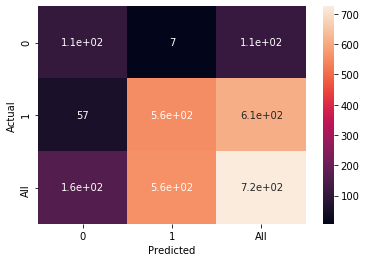

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix2 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix2, annot=True)
plt.show()

In [29]:
import pickle

In [30]:
# simpan model
with open('drug_svm.pickle', 'wb') as f:
    pickle.dump(svmmodel, f)

In [ ]:
# load model
# pickle_in = open('drug_svm.pickle', 'rb')
# clf = pickle.load(pickle_in)